DATA PREPROCESSING

In [40]:
import  tkinter as tk
from PIL import ImageTk, Image
from tkinter.filedialog import askopenfilename
root=tk.Tk()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Data preprocessing is important to clean the dataset and extract columns that will be used for visualization

def data_preprocessing(data_file):
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    df=pd.read_csv(data_file)

    
   
    #PRE-PROCESSING
    # First step - extract the unique columns based on newCasesBySpecimenDate 
    # which are newCasesBySpecimenDate-0 59 and newCasesBySpecimenDate-60+
    # then put them together to get the total number of cases per day
    

    newCasesBySpecimenDate=df[['areaName','date','newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+']]
    newCasesBySpecimenDate['Total cases']=newCasesBySpecimenDate.sum(axis=1)

    'Respective Months and Week can also be Extracted from the newCasesBySpecimenDate df'
    newCasesBySpecimenDate['date']=newCasesBySpecimenDate['date'].astype('datetime64[ns]')
    newCasesBySpecimenDate['months']=newCasesBySpecimenDate['date'].dt.month
    newCasesBySpecimenDate['weeks']=newCasesBySpecimenDate['date'].dt.week
    global newCasesBySpecimenDate_df
    newCasesBySpecimenDate_df=newCasesBySpecimenDate

    
    # Second step - we extract a dataframe of cases from each age group.
    
    df_age_groups = df[['areaName', 'date', 'newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19', 
                       'newCasesBySpecimenDate-20_24', 'newCasesBySpecimenDate-25_29', 'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39', 
                       'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49', 'newCasesBySpecimenDate-50_54', 'newCasesBySpecimenDate-55_59', 
                       'newCasesBySpecimenDate-5_9', 'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69', 'newCasesBySpecimenDate-70_74', 
                       'newCasesBySpecimenDate-75_79', 'newCasesBySpecimenDate-80_84', 'newCasesBySpecimenDate-85_89', 'newCasesBySpecimenDate-90+']]

   
    # From df_age_groups, we extract date, month and week
    df_age_groups['date']=df_age_groups['date'].astype('datetime64[ns]')
    df_age_groups['months']=df_age_groups['date'].dt.month
    df_age_groups['weeks']=df_age_groups['date'].dt.week
    global age_groups_df
    age_groups_df=df_age_groups

    
    # Third step, we extract cumulative cases based on rolling rates
    
    df_roll_rate = df[['date', 'newCasesBySpecimenDateRollingRate-0_4', 'newCasesBySpecimenDateRollingRate-10_14', 'newCasesBySpecimenDateRollingRate-15_19', 
                       'newCasesBySpecimenDateRollingRate-20_24', 'newCasesBySpecimenDateRollingRate-25_29', 'newCasesBySpecimenDateRollingRate-30_34', 'newCasesBySpecimenDateRollingRate-35_39', 
                       'newCasesBySpecimenDateRollingRate-40_44', 'newCasesBySpecimenDateRollingRate-45_49', 'newCasesBySpecimenDateRollingRate-50_54', 'newCasesBySpecimenDateRollingRate-55_59', 
                       'newCasesBySpecimenDateRollingRate-5_9', 'newCasesBySpecimenDateRollingRate-60_64', 'newCasesBySpecimenDateRollingRate-65_69', 'newCasesBySpecimenDateRollingRate-70_74', 
                       'newCasesBySpecimenDateRollingRate-75_79', 'newCasesBySpecimenDateRollingRate-80_84', 'newCasesBySpecimenDateRollingRate-85_89', 'newCasesBySpecimenDateRollingRate-90+']]
    global roll_rate_df
    roll_rate_df= df_roll_rate

    
    # Fourth step - we extract cumulative cases based on rolling sum
    
    df_roll_sum = df[['date', 'newCasesBySpecimenDateRollingSum-0_4', 'newCasesBySpecimenDateRollingSum-10_14', 'newCasesBySpecimenDateRollingSum-15_19', 
                       'newCasesBySpecimenDateRollingSum-20_24', 'newCasesBySpecimenDateRollingSum-25_29', 'newCasesBySpecimenDateRollingSum-30_34', 'newCasesBySpecimenDateRollingSum-35_39', 
                       'newCasesBySpecimenDateRollingSum-40_44', 'newCasesBySpecimenDateRollingSum-45_49', 'newCasesBySpecimenDateRollingSum-50_54', 'newCasesBySpecimenDateRollingSum-55_59', 
                       'newCasesBySpecimenDateRollingSum-5_9', 'newCasesBySpecimenDateRollingSum-60_64', 'newCasesBySpecimenDateRollingSum-65_69', 'newCasesBySpecimenDateRollingSum-70_74', 
                       'newCasesBySpecimenDateRollingSum-75_79', 'newCasesBySpecimenDateRollingSum-80_84', 'newCasesBySpecimenDateRollingSum-85_89', 'newCasesBySpecimenDateRollingSum-90+']]
    global roll_sum_df
    roll_sum_df = df_roll_sum

In [43]:
# Data description of each dataframe

newCasesBySpecimenDate_df.head()

areaName       date  newCasesBySpecimenDate-0_59  \
0  Hartlepool 2020-03-16                            0   
1  Hartlepool 2020-03-17                            0   
2  Hartlepool 2020-03-18                            0   
3  Hartlepool 2020-03-19                            0   
4  Hartlepool 2020-03-20                            0   

   newCasesBySpecimenDate-60+  Total cases  months  weeks  
0                           1            1       3     12  
1                           0            0       3     12  
2                           1            1       3     12  
3                           0            0       3     12  
4                           1            1       3     12

In [48]:
newCasesBySpecimenDate_df.describe()


newCasesBySpecimenDate-0_59  newCasesBySpecimenDate-60+   Total cases  \
count                115027.000000               115027.000000  115027.00000   
mean                     30.679423                    8.746277      39.42570   
std                     351.989931                   81.221092     424.08661   
min                       0.000000                    0.000000       0.00000   
25%                       1.000000                    0.000000       1.00000   
50%                       3.000000                    1.000000       5.00000   
75%                      11.000000                    4.000000      15.00000   
max                   18882.000000                 3852.000000   22734.00000   

              months          weeks  
count  115027.000000  115027.000000  
mean        6.567962      27.175715  
std         2.296569      10.030789  
min         1.000000       5.000000  
25%         5.000000      19.000000  
50%         7.000000      27.000000  
75%         9.000000      36.000000  
max        11.000000      44.000000

In [49]:
roll_rate_df.head()


date  newCasesBySpecimenDateRollingRate-0_4  \
0  2020-03-16                                    0.0   
1  2020-03-17                                    0.0   
2  2020-03-18                                    0.0   
3  2020-03-19                                    0.0   
4  2020-03-20                                    0.0   

   newCasesBySpecimenDateRollingRate-10_14  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-15_19  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-20_24  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-25_29  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-30_34  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-35_39  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-40_44  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-45_49  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-50_54  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-55_59  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-5_9  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   newCasesBySpecimenDateRollingRate-60_64  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-65_69  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   newCasesBySpecimenDateRollingRate-70_74  \
0                                    

In [50]:
roll_rate_df.describe()

newCasesBySpecimenDateRollingRate-0_4  \
count                          115027.000000   
mean                               10.503016   
std                                25.948657   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 8.900000   
max                               365.400000   

       newCasesBySpecimenDateRollingRate-10_14  \
count                            115027.000000   
mean                                 17.128805   
std                                  47.973201   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                  10.600000   
max                                 711.700000   

       newCasesBySpecimenDateRollingRate-15_19  \
count                            115027.000000   
mean                                 64.340413   
std                                 175.823388   
min                                   0.000000   
25%                                   0.000000   
50%                                   6.300000   
75%                                  31.000000   
max                                5392.900000   

       newCasesBySpecimenDateRollingRate-20_24  \
count                            115027.000000   
mean                                 67.946518   
std                                 139.922177   
min                                   0.000000   
25%                                   0.000000   
50%                                  17.400000   
75%                                  54.600000   
max                                2634.800000   

       newCasesBySpecimenDateRollingRate-25_29  \
count                            115027.000000   
mean                                 52.998679   
std                                 102.129666   
min                                   0.000000   
25%                                   0.000000   
50%                                  18.200000   
75%                                  53.500000   
max                                1166.600000   

       newCasesBySpecimenDateRollingRate-30_34  \
count                            115027.000000   
mean                                 49.623335   
std                                  98.804514   
min                                   0.000000   
25%                                   0.000000   
50%                                  16.900000   
75%                                  49.500000   
max                                1351.700000   

       newCasesBySpecimenDateRollingRate-35_39  \
count                            115027.000000   
mean                                 45.549723   
std                                  94.896178   
min                                   0.000000   
25%                                   0.000000   
50%                                  15.200000   
75%                                  44.100000   
max                                1228.200000   

       newCasesBySpecimenDateRollingRate-40_44  \
count                            115027.000000   
mean                                 47.020491   
std                                  96.639330   
min                                   0.000000   
25%                                   0.000000   
50%                                  15.800000   
75%                                  47.300000   
max                                1258.300000   

       newCasesBySpecimenDateRollingRate-45_49  \
count                            115027.000000   
mean                                 45.631046   
std                                  90.658076   
min                                   0.000000   
25%                                   0.000000   
50%                                  15.400000   
75%                                  48.200000   
max              

In [51]:
roll_sum_df.head()

date  newCasesBySpecimenDateRollingSum-0_4  \
0  2020-03-16                                     0   
1  2020-03-17                                     0   
2  2020-03-18                                     0   
3  2020-03-19                                     0   
4  2020-03-20                                     0   

   newCasesBySpecimenDateRollingSum-10_14  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-15_19  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-20_24  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-25_29  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-30_34  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-35_39  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-40_44  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-45_49  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-50_54  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-55_59  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-5_9  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   newCasesBySpecimenDateRollingSum-60_64  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-65_69  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-70_74  \
0                                       0   
1                                       0   
2                               

In [52]:
roll_sum_df.describe()

newCasesBySpecimenDateRollingSum-0_4  \
count                         115027.000000   
mean                               4.009380   
std                               49.686377   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                1.000000   
max                             2467.000000   

       newCasesBySpecimenDateRollingSum-10_14  \
count                            115027.00000   
mean                                  6.68756   
std                                  89.75941   
min                                   0.00000   
25%                                   0.00000   
50%                                   0.00000   
75%                                   1.00000   
max                                4769.00000   

       newCasesBySpecimenDateRollingSum-15_19  \
count                           115027.000000   
mean                                23.419293   
std                                335.936852   
min                                  0.000000   
25%                                  0.000000   
50%                                  1.000000   
75%                                  4.000000   
max                              17751.000000   

       newCasesBySpecimenDateRollingSum-20_24  \
count                           115027.000000   
mean                                27.193172   
std                                337.219928   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  8.000000   
max                              14712.000000   

       newCasesBySpecimenDateRollingSum-25_29  \
count                           115027.000000   
mean                                22.589992   
std                                251.284360   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  8.000000   
max                              12580.000000   

       newCasesBySpecimenDateRollingSum-30_34  \
count                           115027.000000   
mean                                21.050162   
std                                233.996485   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  8.000000   
max                              11896.000000   

       newCasesBySpecimenDateRollingSum-35_39  \
count                           115027.000000   
mean                                18.773184   
std                                209.356973   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  7.000000   
max                              10770.000000   

       newCasesBySpecimenDateRollingSum-40_44  \
count                           115027.000000   
mean                                17.493849   
std                                192.343334   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  7.000000   
max                              10108.000000   

       newCasesBySpecimenDateRollingSum-45_49  \
count                           115027.000000   
mean                                18.616360   
std                                201.771623   
min                                  0.000000   
25%                                  0.000000   
50%                                  2.000000   
75%                                  7.000000   
max                              10508.000000   

       newCasesBySpecimenDateRollingSum-50_54  

DATA VISUALIZATION 

In [53]:
import matplotlib.pyplot as plt
  
    # Top 5 areas with the highest number of cases and age group distribution
    
def plot_by_newCasesBySpecimenDate(newCasesBySpecimenDate):
  newCasesBySpecimenDate.groupby('areaName')['Total cases','newCasesBySpecimenDate-0_59','newCasesBySpecimenDate-60+' ].sum().sort_values('Total cases', ascending=False).head(5)\
  .plot(kind='bar', color= ['green', 'blue', 'yellow'], figsize=(12,7))
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 5 Areas With The Highest Number of Cases With The Age Group Distribution')
  plt.tight_layout()
  plt.show()

    # Total Number of Cases recorded throughout the entire timeframe of the dataset
    
def plot_by_age_groups(df_age_groups):  
  df_age_groups.sum().to_frame().drop(['months', 'areaName', 'weeks']).rename(columns={0:'Total cases'}).sort_values('Total cases')\
  .plot(kind='bar',figsize=(12,7), color='yellow')
  plt.xlabel('Age-Range')
  plt.ylabel('Total cases')
  plt.title('Total Number of Cases Recorded For Each Age Group')
  plt.tight_layout()
  plt.show()



  # Top 3 Areas with the lowest number of cases


def plot_by_lowestCasesBySpecimenDate(newCasesBySpecimenDate):   
  newCasesBySpecimenDate.groupby('areaName')['Total cases','newCasesBySpecimenDate-0_59','newCasesBySpecimenDate-60+' ].sum().sort_values('Total cases', ascending=False).tail(3)\
  .plot(kind='bar', color= ['green', 'blue', 'orange'], figsize=(12,7))
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 3 Areas With The Lowest of Cases With Their Age_Distribution')
  plt.tight_layout()
  plt.show()


    # Donut chart showing comparison of total cases of people between age 0-59 and people above 60
    
def plot_by_casesTotalCasesBelow59AndAbove60(newCasesBySpecimenDate):
  colors=['red', 'green']
  labels=['Total cases age -0_59', 'Total cases age -60+']
  newCasesBySpecimenDate.sum().to_frame().reset_index().drop([0,3, 4, 5]).set_index('index').plot(kind='pie', y=0, colors=colors, labels=labels,autopct='%1.1f%%',figsize=(12,7))
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()
  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)
  plt.title('Comparison of Total Cases of People Between Ages 0-59 and People Above 60')
  plt.show()


    # Pie Chart Showing Comparison of Total cases Per Month

def plot_chart_casesByMonth(newCasesBySpecimenDate):
  newCasesBySpecimenDate.groupby('months')['Total cases'].sum().to_frame().plot(kind='pie',y='Total cases',autopct='%1.1f%%',figsize=(20,7) )
  plt.title('Comparison of Total Cases Per Month')
  plt.show()
  "Top 5 Areas with the highest number of cases in October the month with highest recorded case"
  newCasesBySpecimenDate10=newCasesBySpecimenDate[newCasesBySpecimenDate['months']==10].   \
  groupby('areaName')['Total cases'].sum().to_frame().reset_index().sort_values('Total cases', ascending=False)   \
  
  colors_list = ['Green', 'Orange', 'Black', 'Red', 'Blue']
  newCasesBySpecimenDate10=newCasesBySpecimenDate10.head(5)
  plt.figure(figsize=(12,7))
  ax=plt.barh(newCasesBySpecimenDate10['areaName'], newCasesBySpecimenDate10['Total cases'], color = colors_list)
  total=2396342
  for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        plt.annotate(percentage, (x, y))
  
  plt.xlabel('Total cases')
  plt.ylabel('AreaName')
  plt.title('Top 5 Areas With The Most Documented Cases - October')
  plt.show()

    
    # Total number of cases reported each week for people below ages 59 and people above ages 59
    
def plot_chart_casesBelow59AndAbove60PerWeek(newCasesBySpecimenDate):
  colors=['green', 'yellow']
  newCasesBySpecimenDate.groupby('weeks')['newCasesBySpecimenDate-60+', 'newCasesBySpecimenDate-0_59' ].sum().plot(kind='bar', figsize=(12,7),stacked=True, color= colors)
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of Cases Reported Each Week for People With Ages <59 and >59 ')
  plt.show()
    
    
    # Trends for total new cases of people below 59 and above 60 per month
    
def plot_chart_casesBelow59AndAbove60PerMonth(newCasesBySpecimenDate):
  newCasesBySpecimenDate.groupby('months').sum()[['newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+']].plot(kind='bar',figsize=(15,8), color = ['red','yellow', 'blue'])
  plt.xlabel('Months')
  plt.ylabel('Total cases')
  plt.title('Total newCases Of people with Ages <59 and >60 Per Month')
  plt.tight_layout()
  plt.show()

    # Total number of cases reported each day
    
def plot_chart_casesReportedPerDay(newCasesBySpecimenDate):
  newCasesBySpecimenDate[['date', 'Total cases']].set_index('date').plot(kind='line',figsize=(12,7), color='orange')
  plt.xlabel('Dates')
  plt.ylabel('Total cases')
  plt.title('Total number of Cases Reported Each Day From 2020-02 to 2020-11')
  plt.show()


  # Total number of cases reported each week from from 2020-03-16 to 2020-11-01
    
def plot_chart_casesByWeek(newCasesBySpecimenDate):
  newCasesBySpecimenDate.groupby('weeks')['Total cases'].sum().plot(kind='line', figsize=(12,7), color='lime')
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each week')
  plt.show()


    # Cumulative cases per day across age ranges by rolling rates
    
def plot_by_rollingrates(df_roll_rate):
    
    df_roll_rate['Total Cum cases']=df_roll_rate.sum(axis=1)
    df_roll_rate[['date', 'Total Cum cases']].set_index('date').plot(kind='line', figsize=(12,7))
    plt.xlabel('Date')
    plt.ylabel('Total cases')
    plt.title('Total Number of Cumulative Cases Per Day Across Age Ranges by RollingRates')
    plt.show()

    # Cumulative Cases Per Day Across Age Ranges by RollingSum
def plot_by_rollingsum(df_roll_sum):
    
    df_roll_sum['Total Cum cases']=df_roll_sum.sum(axis=1)
    df_roll_sum[['date', 'Total Cum cases']].set_index('date').plot(kind='line', figsize=(12,7))
    plt.xlabel('Date')
    plt.ylabel('Total cases')
    plt.title('Total Number of Cumulative Cases Per Day Across Age Ranges by RollingSum')
    plt.show()

In [54]:
# DATA EXTRACTION

# The Stop & Search data would be retrieved by force API which is dependent on force IDs by first getting the list of force IDs via the API : https://data.police.uk/api/forces 

# DATA GATHERING VIA API

def extract_data():
    
    from urllib.request import urlopen
    import json as js
    html='https://data.police.uk/api/forces'  # Html to the force API
    html_request=urlopen(html)
    force_id=html_request.read()
    force_ids=js.loads(force_id)              # Load the returned force_ids into a json object
    ids=list()
    for id in force_ids:
        id=id['id']
        ids.append(id)

# We can now collect the stop and search data for the respective force ids now that we have the force ids. 
# Because the data was collected in October 2021, we set the date settings to 2021-10.

    base_url='https://data.police.uk/api/stops-force?'

    from urllib.parse import urlencode

# Create a list for the data collected

    age_range=list()
    self_defined_ethnicity=list()
    outcome_linked_to_object_of_search=list()
    datetime=list()
    removal_of_more_than_outer_clothing=list()
    operation=list()
    officer_defined_ethnicity=list()
    object_of_search=list()
    involved_person=list()
    gender=list()
    legislation=list()
    location=list()
    outcome=list()
    type_=list()
    operation_name=list()
    force_ids=list()

# For the month of OCTOBER, we loop through each of the force ids and collect their stop and search by force data.


    for id in ids:
        params=dict()                                     
        params['force']=id  
        params['date']='2021-10'                            
        service_url=urlencode(params)                   
        url=base_url+service_url
        
# We make use of try and except for any errors that would be returned

        try:
            html_stop_searches=urlopen(url)
        except:
            continue 
        stop_searches=html_stop_searches.read()
        js_stop_searches=js.loads(stop_searches)         

     

        for js_stop_search in js_stop_searches:
            force_ids.append(id)
            age_range.append(js_stop_search['age_range'])
            self_defined_ethnicity.append(js_stop_search['self_defined_ethnicity'])
            outcome_linked_to_object_of_search.append(js_stop_search['outcome_linked_to_object_of_search'])
            datetime.append(js_stop_search['datetime'])
            removal_of_more_than_outer_clothing.append(js_stop_search['removal_of_more_than_outer_clothing'])
            officer_defined_ethnicity.append(js_stop_search['officer_defined_ethnicity'])
            object_of_search.append(js_stop_search['object_of_search'])
            involved_person.append(js_stop_search['involved_person'])
            gender.append(js_stop_search['gender'])
            legislation.append(js_stop_search['legislation'])
            location.append(js_stop_search['location'])
            outcome.append(js_stop_search['outcome'])
            type_.append(js_stop_search['type'])
            operation_name.append(js_stop_search['operation_name'])
            operation.append(js_stop_search['operation'])
            
# For pandas dataframe, we make a dictionary for the data names and column names.

    data={'age_range':age_range,
    'self_defined_ethnicity':self_defined_ethnicity,
    'outcome_linked_to_object_of_search':outcome_linked_to_object_of_search,
    'datetime':datetime,
    'removal_of_more_than_outer_clothing':removal_of_more_than_outer_clothing,
    'operation':operation,
    'officer_defined_ethnicity':officer_defined_ethnicity,
    'object_of_search':object_of_search,
    'involved_person':involved_person,
    'gender':gender,
    'legislation':legislation,
    'location':location,
    'outcome':outcome,
    'type_':type_,
    'operation_name':operation_name,
    'force_ids':force_ids}
    return pd.DataFrame(data)

# DATA CLEANING FOR STOP AND SEARCH DATA
    
def data_cleaning(df):
    import pandas as pd
    
    # Extract  hour from dataframe
    
    df['datetime']= pd.to_datetime(df['datetime'])
    df['Hour']=df['datetime'].dt.hour
    df.drop('datetime', axis=1, inplace=True)

    # From the location column, extract the street names.

    streets=list()
    for i in df['location'].values:
        try:
            streets.append(i['street']['name'])
        except:
            streets.append('None')
    
    df['location']=streets

# Due to a large number of missing values in the operation name column, we drop it and and mark all missing entries as unknown.

    df=df.drop('operation_name', axis=1)
    df=df.fillna('Unknown')
    return df

In [55]:
# DATA VISUALIZATION FOR STOP AND SEARCH DATA

def plotting(df):
    
# Stop and search force for each force using a bar chart

    df['force_ids'].value_counts().to_frame().sample(frac=1).plot(kind='bar', figsize=(12,7))
    plt.xlabel('Force')
    plt.ylabel('Count')
    plt.title('Number of Stop & Search by Force for Each Force')
    plt.tight_layout()
    plt.show()
    
# Gender distribution visualization using countplot

    fig, ax = plt.subplots(figsize=(12,7))
    sns.countplot(x=df['gender'])
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Gender Distribution')
    plt.tight_layout()
    plt.show()
    
# Age range distribution visualization using countplot

    fig, ax = plt.subplots(figsize=(12,7))
    sns.countplot(x=df['age_range'])
    plt.xlabel('Age-range')
    plt.ylabel('Count')
    plt.title('Age Range Distribution')
    plt.tight_layout()
    plt.show()
    
# Comparison of outcome linked to search object" in a pie chart  

    df['outcome_linked_to_object_of_search'].value_counts().to_frame().plot(kind='pie',autopct='%1.1f%%', y='outcome_linked_to_object_of_search', figsize=(12,7))
    plt.title('Pie chart showing comparison of outcome_linked_to_object_of_search')
    plt.tight_layout()
    plt.show()
    
# Trend of outcome by removal_of_more_than_outer_clothing using a stacked bar chart

    df.groupby('removal_of_more_than_outer_clothing')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).\
    reset_index().pivot("removal_of_more_than_outer_clothing", 'outcome',	'count').plot(kind='barh',stacked=True, width=0.5,figsize=(12,7))
    plt.xlabel('Count')
    plt.title('Trend of Outcome by Removal_of_more_than_outer_clothing')
    plt.tight_layout()
    plt.show()
  
      
# Trend of distribution for officer_defined_ethnicity and self_defined_ethnicity by grouped bar chart

    self_defined_ethnicity_extract=list()
    for i in df['self_defined_ethnicity'].values:
      self_defined_ethnicity_extract.append(i[:5])
    df['self_defined_ethnicity_extract']=self_defined_ethnicity_extract
    df['self_defined_ethnicity_extract'].replace('Unkno', 'Unknown', inplace=True)
    df1=df['officer_defined_ethnicity'].value_counts().to_frame()
    df2=df['self_defined_ethnicity_extract'].value_counts().to_frame()
    df3=pd.concat([df1,df2], axis=1)
    df3.plot(kind='bar', figsize=(15,8))
    plt.ylabel('Count')
    plt.xlabel('Ethnicity')
    plt.title('Trend of Distribution for Officer_defined_ethnicity and Self_defined_ethnicity')
    plt.tight_layout()
    plt.show()
  
 # Proportion of search types using donut chart

    df_t=df['type_'].value_counts().to_frame().reset_index()
    colors= ['#00008B', '#0000CD', '#FFFF00']
    labels=['Person search','Person and Vehicle search','Vehicle search']
    # Pie Chart
    df_t['type_'].plot(kind='pie', colors=colors,labels=labels, autopct='%1.1f%%', pctdistance=0.85,figsize=(12,7))
      
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
      
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.title('Proportion of Search Types')
    plt.tight_layout()
    plt.show()

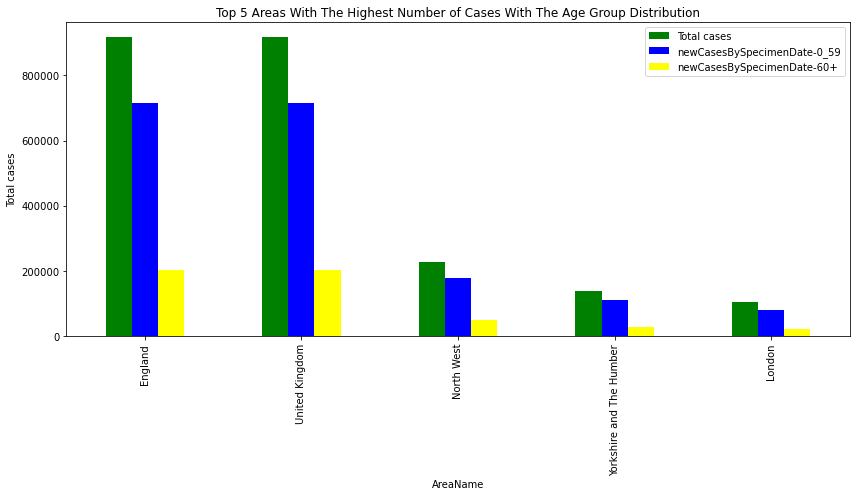

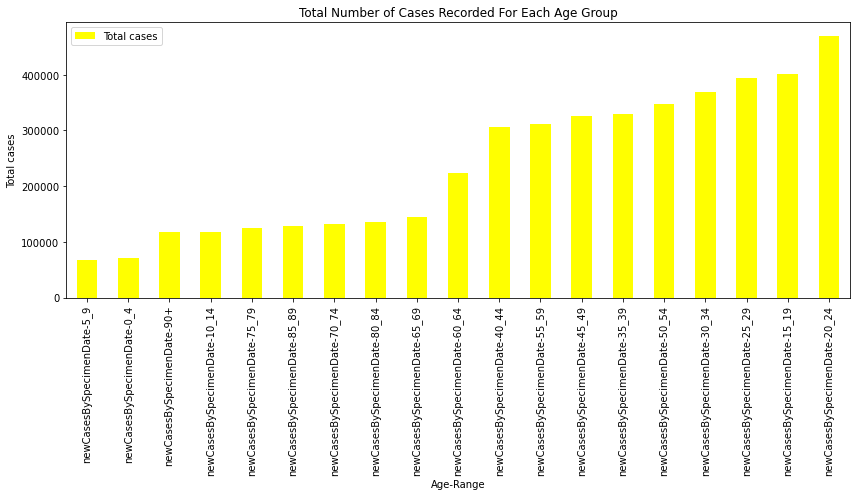

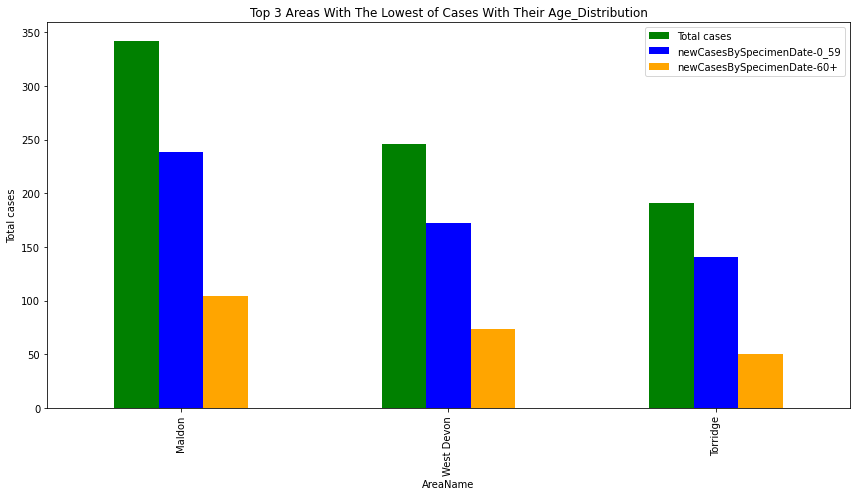

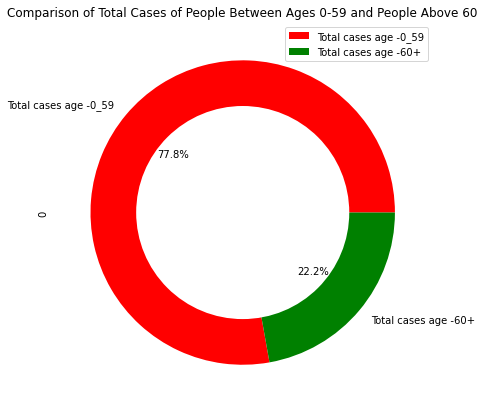

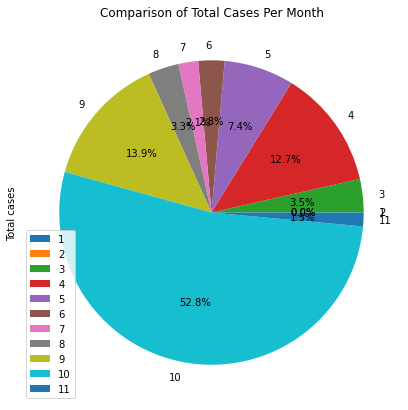

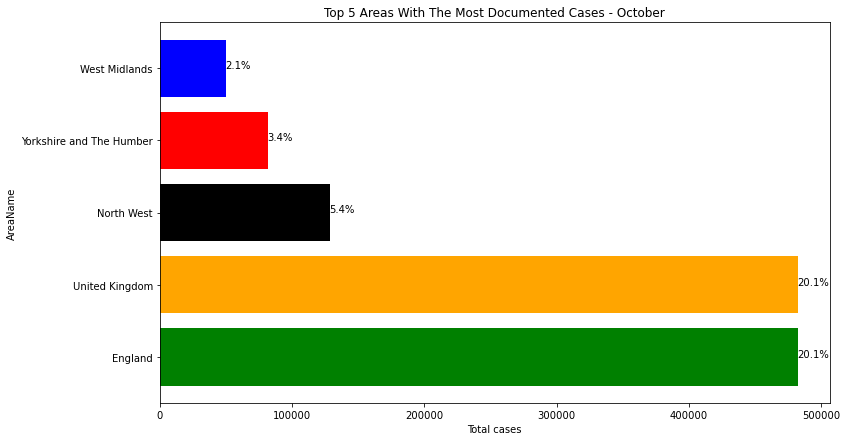

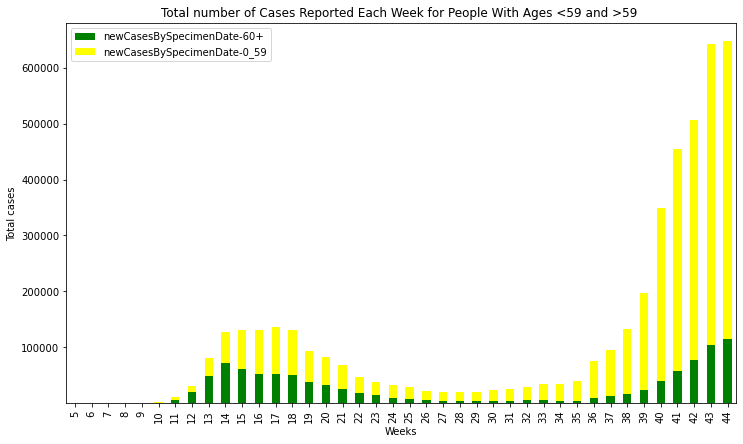

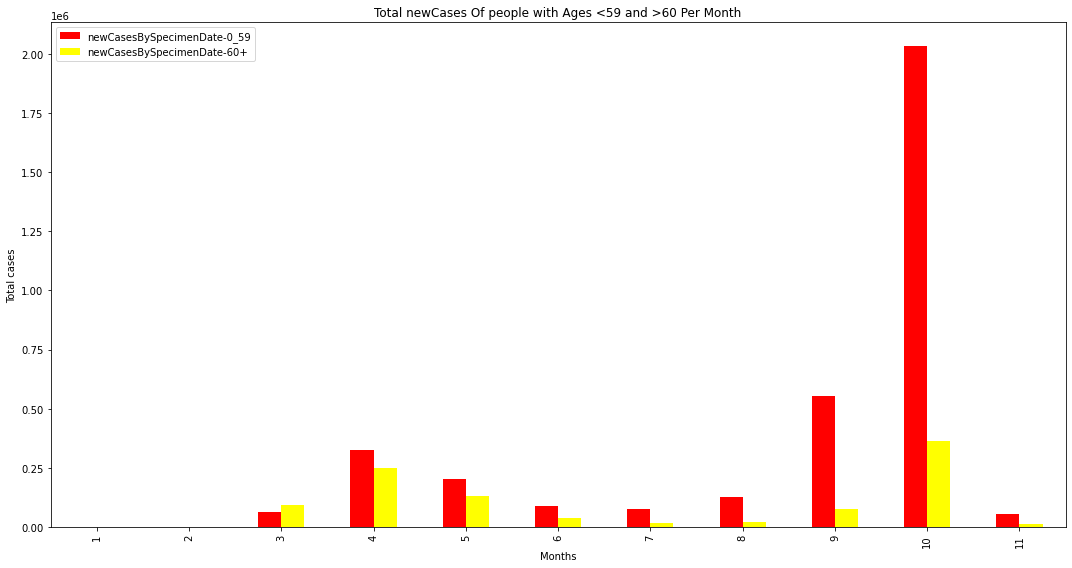

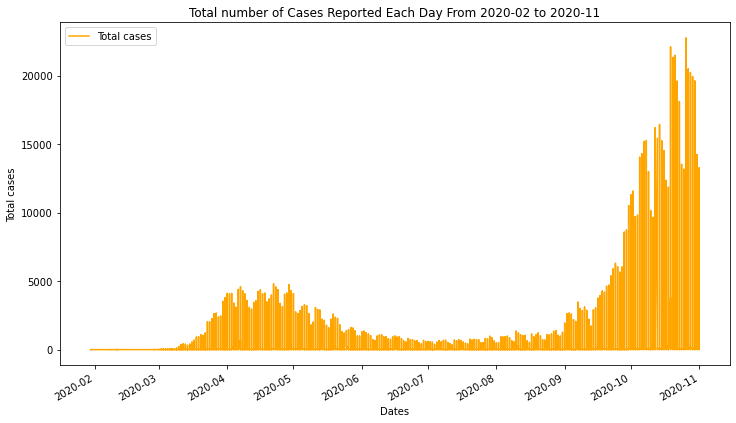

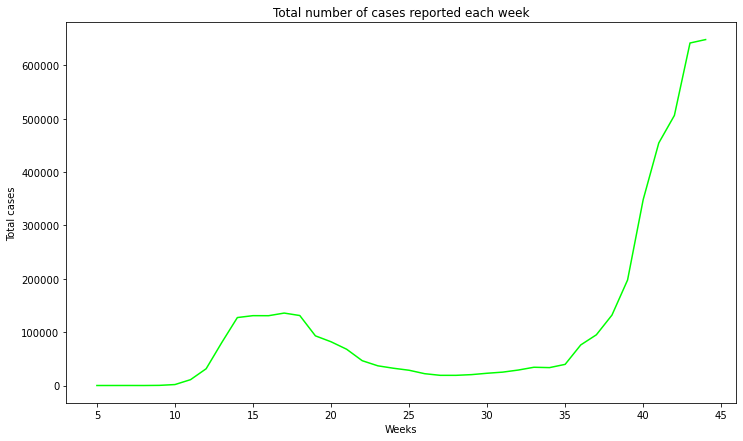

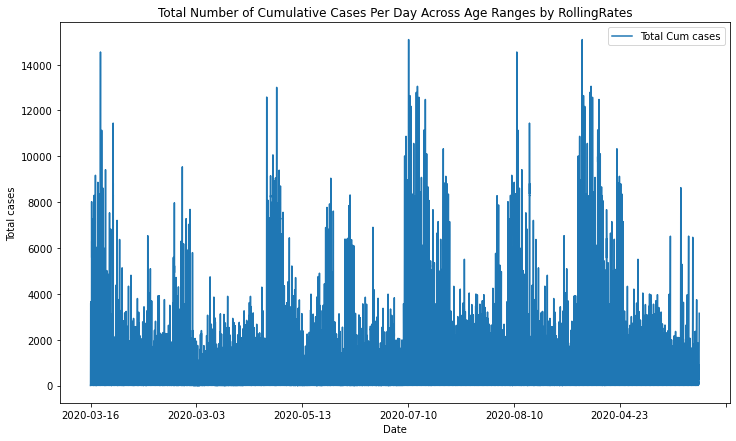

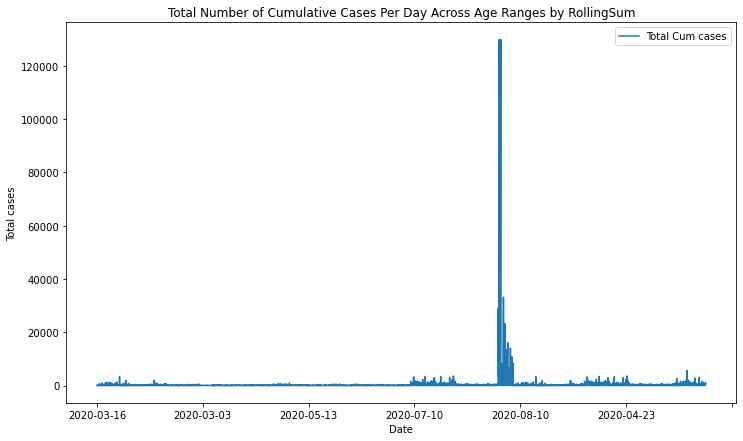

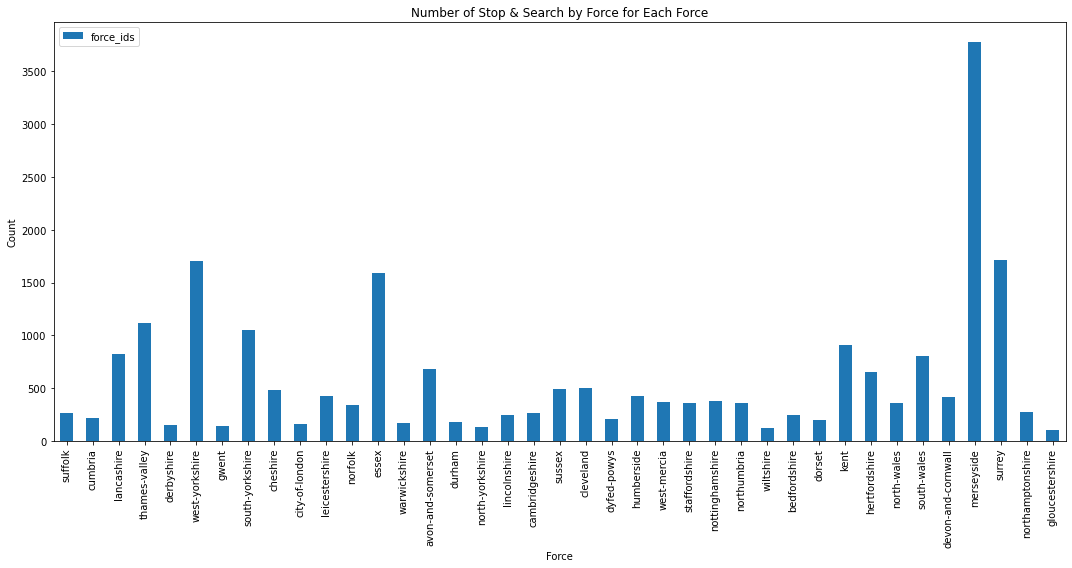

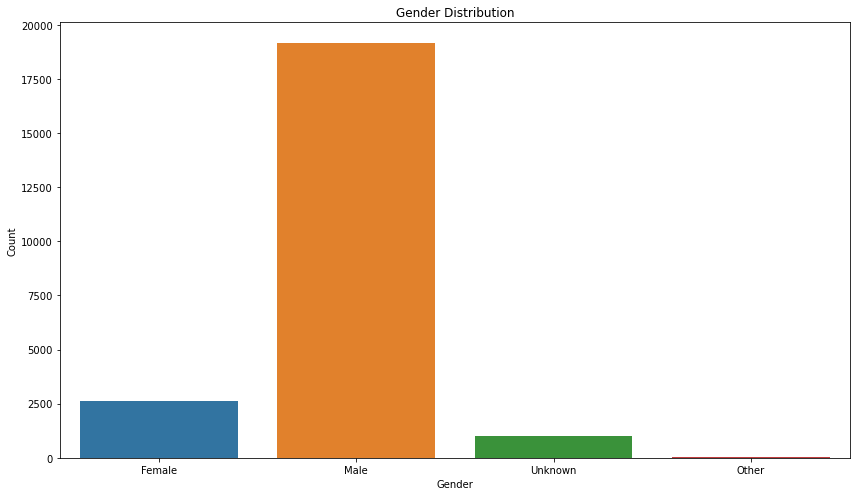

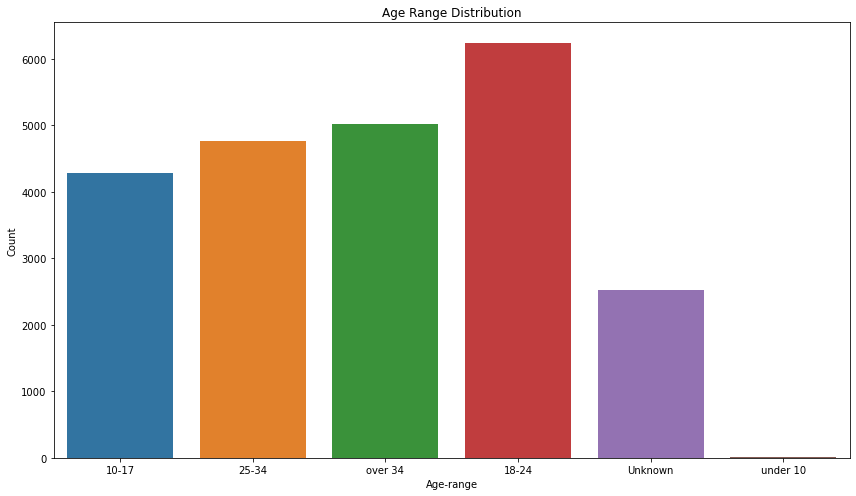

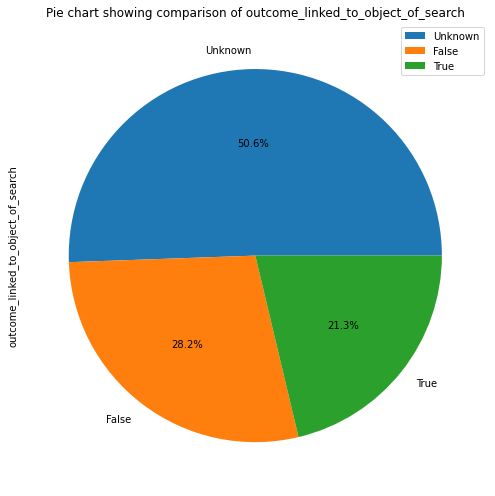

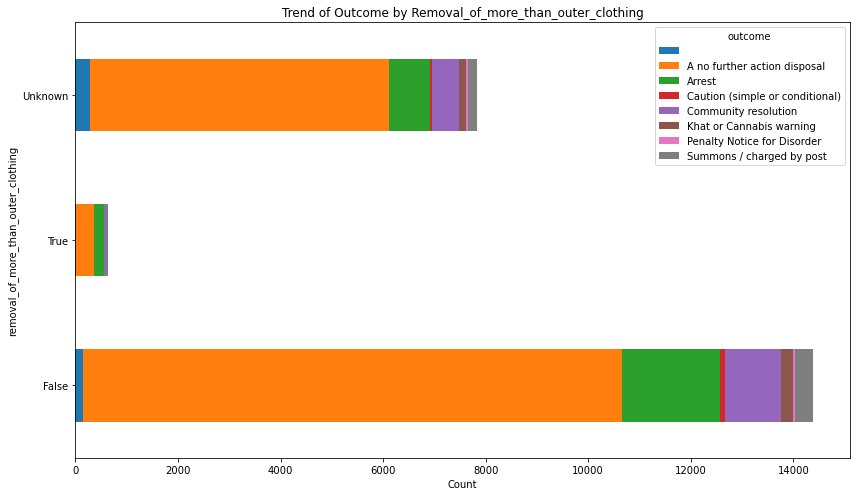

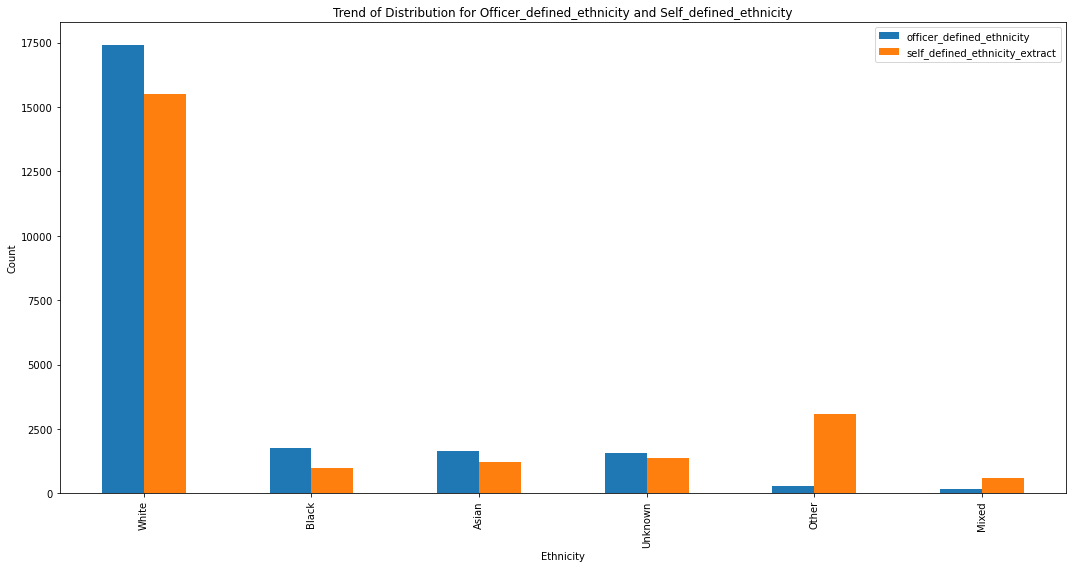

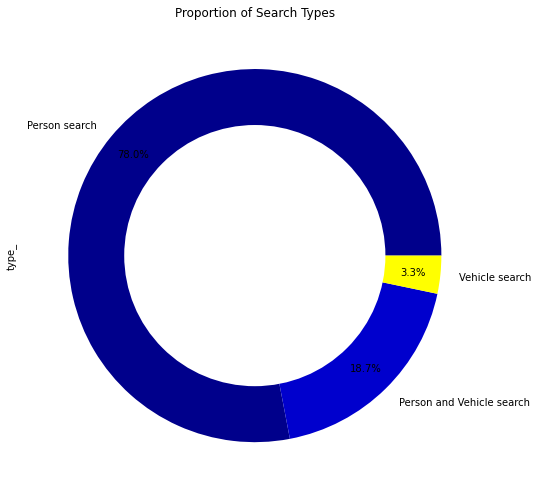

In [ ]:
# To display the charts in GUI

canvas=tk.Canvas(root, height=700, width=850)
canvas.pack()

bi=tk.PhotoImage(file='suresync-suite-background.png')
bl=tk.Label(root, image=bi)
bl.place(relheight=1, relwidth=1)

pathtophoto = Image.open("tes.png")
image1 = ImageTk.PhotoImage(pathtophoto)
panel1 = tk.Label(root, image=image1)
panel1.image = image1 #keep a reference
panel1.place(relx=0, rely=0)

def RunCovid():
   
    button_text.set("SELECT COVID DATASET") 
    
    text_box=tk.Text(root, height=1, width=10, padx=15, pady=15 )
    #text_box.insert(1.0, x)
    text_box.place(relx=0.1, rely=0.7, relheight=0.3, relwidth=0.8)
    
    filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
    if filename:
        data_preprocessing(filename) 
    
    plot_by_newCasesBySpecimenDate(newCasesBySpecimenDate_df)
    plot_by_age_groups(age_groups_df)
    plot_by_lowestCasesBySpecimenDate(newCasesBySpecimenDate_df)
    plot_by_casesTotalCasesBelow59AndAbove60(newCasesBySpecimenDate_df)
    plot_chart_casesByMonth(newCasesBySpecimenDate_df)
    plot_chart_casesBelow59AndAbove60PerWeek(newCasesBySpecimenDate_df)
    plot_chart_casesBelow59AndAbove60PerMonth(newCasesBySpecimenDate_df)
    plot_chart_casesReportedPerDay(newCasesBySpecimenDate_df)
    plot_chart_casesByWeek(newCasesBySpecimenDate_df)
    plot_by_rollingrates(roll_rate_df)
    plot_by_rollingsum(roll_sum_df)

    
button_text=tk.StringVar()
button=tk.Button(root, textvariable=button_text, bg='white', command=lambda: RunCovid())
button_text.set("SELECT COVID DATASET")
button.place(relx=0.25, rely=0.55, relheight=0.1, relwidth=0.2)

def RunStopAndSearch():
    button2_text.set("Load-API")
    unclean = extract_data()
    clean = data_cleaning(unclean)   
    plotting(clean)

button2_text=tk.StringVar()
button2=tk.Button(root, textvariable=button2_text, bg='white', command=lambda: RunStopAndSearch())
button2_text.set("SELECT STOP & SEARCH DATASET")
button2.place(relx=0.6, rely=0.55, relheight=0.1, relwidth=0.25)
button2_text=tk.StringVar()

root.mainloop()